In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path='/content/drive/MyDrive/Summer Intern Project/dataset'

In [ ]:
from scipy.io import loadmat
train = loadmat('/content/drive/MyDrive/Summer Intern Project/train_data.mat')
print(train)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Aug 16 19:16:04 2022', '__version__': '1.0', '__globals__': [], 'train_data': array([[  0.53039232 +0.63133558j,   0.36400478 +0.09854811j,
         -0.22950626 +0.3680945j , ...,   0.44192371 -0.2358153j ,
         -0.17192364 +1.94206358j,  -0.53957227 -0.30151011j],
       [  0.99192036 +0.30764703j,   1.09968216 +0.29103408j,
          0.70927137 -1.37775993j, ...,  -0.30358309 +0.07182654j,
          1.18902697 +0.08145313j,   0.49131366 -0.10803168j],
       [ -0.42123559 +0.80897813j,  -0.18598452 +1.04028441j,
         -0.57234572 +2.65512056j, ...,   0.47326303 +1.27059188j,
          0.34802847 +0.64655054j,   0.08742362 -0.92867976j],
       ...,
       [-23.83375939+23.73400411j,  33.9527993 +23.78701064j,
         15.88724076+24.1710308j , ..., -33.97286019-25.4430662j ,
          4.33523944 +4.54513376j,   3.34093163+33.88585604j],
       [-33.90674558-24.52295917j,  24.76359407 +4.99359117j,
       

In [ ]:
test = loadmat('/content/drive/MyDrive/Summer Intern Project/test_data.mat')

In [ ]:
valid=loadmat('/content/drive/MyDrive/Summer Intern Project/valid_data.mat')

In [ ]:
train['train_data'].shape

(6300, 200)

In [ ]:
train_data=train['train_data']

In [ ]:
test_data=test['test_data']

In [ ]:
valid_data=valid['valid_data']

In [ ]:
images_per_class=int(len(train_data)/6)

In [ ]:
images_per_class

1050

In [ ]:
n_classes=6

In [ ]:
train_data[0][0].imag

0.6313355803451519

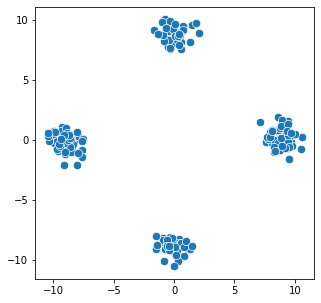

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=train_data[700].real, y=train_data[700].imag, s=70);
plt.savefig('scatter plot.png',bbox_inches='tight')

In [ ]:
classes=[str(i) for i in range(n_classes)]

In [ ]:
folders=['train','valid']

In [ ]:
for cls in classes:
    for folder in folders:
        if not os.path.exists(dataset_path+'/'+folder+'/'+cls):
            os.makedirs(dataset_path+'/'+folder+'/'+cls)

In [ ]:
path = os.getcwd()

In [ ]:
path

'/content'

In [ ]:
type(train_data)

numpy.ndarray

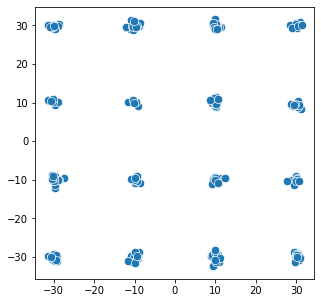

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=test_data[1399].real, y=test_data[1399].imag,s=70);
plt.savefig('/sample.png',bbox_inches='tight')

In [ ]:
def plot_images(folder):
    cnt=0
    for cls in classes:
        it=0
        for i in range(cnt*images_per_class,(cnt+1)*images_per_class):
            plt.figure(figsize=(5,5))
            plt.axis('off')
            sns_sp=sns.scatterplot(x=train_data[i].real, y=train_data[i].imag,s=70)
            fig = sns_sp.get_figure()
            fig.savefig(dataset_path+'/'+folder+'/'+cls+'/'+str(it)+'.png')
            plt.clf()
            it+=1
        cnt+=1

In [ ]:
plot_images('train');

In [ ]:
valid_images_per_class=350

In [ ]:
def plot_valid_images(folder):
    cnt=0
    for cls in classes:
        it=0
        for i in range(cnt*valid_images_per_class,(cnt+1)*valid_images_per_class):
            plt.figure(figsize=(5,5))
            plt.axis('off')
            sns_sp=sns.scatterplot(x=valid_data[i].real, y=valid_data[i].imag,s=70)
            fig = sns_sp.get_figure()
            fig.savefig(dataset_path+'/'+folder+'/'+cls+'/'+str(it)+'.png')
            plt.clf()
            it+=1
        cnt+=1

In [ ]:
plot_valid_images('valid')

In [ ]:
test_images = 350

In [ ]:
snr_range = 35

In [ ]:
test_img_per_snr=int(test_images/snr_range)

In [ ]:
int(test_images/snr_range)

10

In [ ]:
def save_test_images(folder):
    cnt=0
    for cls in classes:
        for snr in range(-4,30):
            if not os.path.exists((dataset_path+'/'+folder+'/'+str(snr)+'/'+cls)):
                os.makedirs((dataset_path+'/'+folder+'/'+str(snr)+'/'+cls))
            it=0
            for i in range(cnt*test_img_per_snr,(cnt+1)*test_img_per_snr):
                plt.figure(figsize=(5,5))
                plt.axis('off')
                sns_sp=sns.scatterplot(x=test_data[i].real, y=test_data[i].imag,s=70)
                fig = sns_sp.get_figure()
                fig.savefig(dataset_path+'/'+folder+'/'+str(snr)+'/'+cls+'/'+str(it)+'.png')
                plt.clf()
                it+=1
            cnt+=1

In [ ]:
len(test_data)

2100

In [ ]:
save_test_images('test')